In [165]:
import matplotlib.pyplot as plt
import numpy as np

In [166]:
points = [(2,0), (6,0), (6,2), (8,2), (8,5), (5,5), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]

points = [(2,0), (6,0), (6,2), (8,2), (8,5), (7,5), (7,7), (5,7), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]

In [167]:
def generateAllBoundaryPoints(points):
    # find the point with the lowest y-coordinate and the lowest x-coordinate
    border = []
    # print(points)
    starting_point = points[0]
    border.append(starting_point)
    current_point = points[0]
    next_point = points[1]
    i = 1
    while (next_point != starting_point):
        # print("Staring from: ", current_point, "To: ", next_point)
        while( current_point != next_point):
            # print(current_point[0]==next_point[0], current_point[1]==next_point[1], current_point[0], next_point[0], current_point[1], next_point[1])
            if(current_point[0]==next_point[0]):
                if(current_point[1]<next_point[1]):
                    current_point = (current_point[0], current_point[1]+1)
                else:
                    current_point = (current_point[0], current_point[1]-1)
            elif(current_point[1]==next_point[1]):
                if(current_point[0]<next_point[0]):
                    current_point = (current_point[0]+1, current_point[1])
                else:
                    current_point = (current_point[0]-1, current_point[1])
            # print("Adding point: ", current_point)
            border.append(current_point)
        if(current_point == next_point):
            # print("Boundary break: ", next_point)
            i += 1
            if(i < len(points)):
                next_point = points[i]
            else:
                # mssing points bettween next_point and starting_point
                # print("mssing points bettween ",next_point ,"and", starting_point)
                if(next_point[0]==starting_point[0]):
                    if(next_point[1]<starting_point[1]):
                        next_point = (next_point[0], next_point[1]+1)
                    else:
                        next_point = (next_point[0], next_point[1]-1)
                elif (next_point[1]==starting_point[1]):
                    if(next_point[0]<starting_point[0]):
                        next_point = (next_point[0]+1, next_point[1])
                    else:
                        next_point = (next_point[0]-1, next_point[1])
                else:
                    next_point = starting_point
    return border

In [168]:
def verifyLineLength(x1, y1, points, edge_x, edge_y):
    if not ( edge_x[0] <= x1 <= edge_x[1]) and ( edge_y[0] <= y1 <= edge_y[1]):
        return []
    if (x1, y1) not in bounrday:
        return []
    if (x1, y1) in bounrday and len(points) > 0:
        points.append((x1, y1))
    return points

In [169]:
def checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
    return ((x1, y1) not in bounrday ) and ( edge_x[0] <= x1 <= edge_x[1]) and ( edge_y[0] <= y1 <= edge_y[1])

In [170]:
def drawInnerLine(point, bounrday, edge=((0,10), (0,10)), flow="r"):
    x = point[0]
    y = point[1]
    points = []
    edge_x = edge[0]
    edge_y = edge[1]
    if(flow == "r"):
        x1, y1 = x+1, y
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1+1, y1
    elif(flow == "l"):
        x1, y1 = x-1, y
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1-1, y1
    elif(flow == "u"):
        x1, y1 = x, y-1
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1, y1-1
    elif(flow == "d"):
        x1, y1 = x, y+1
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1, y1+1
    else:
        return []
    
    points = verifyLineLength(x1, y1, points, edge_x, edge_y)
    allinBoundary = True
    for p in points:
        if p not in bounrday:
            # print(p, " is not in boundary")
            allinBoundary = False
            break
    if(allinBoundary):
        return []

    return points

In [171]:
def isInLineList(line, lineList):
    if line in lineList:
        return True
    tmp_line = [ line[1], line[0] ]
    if tmp_line in lineList:
        return True
    return False

In [172]:
def checkAndAppend(inner_points, intersection_point, cut_lines):
    if len(inner_points) > 0:
        tmp_p = [intersection_point, inner_points[-1]]
        if(not isInLineList(tmp_p, cut_lines)):
            cut_lines.append([intersection_point, inner_points[-1]])
    return cut_lines

In [173]:
def findCutLines(points, edge):
    bounrday = generateAllBoundaryPoints(points)
    start_point = points[0]
    previous_line = None
    cut_lines = []
    for index in range(len(points)):
        x =  points[index]
        if(index >= len(points)-1):
            y = points[0]
        else:
            y = points[index+1]
        if previous_line is None:
            previous_line = [x, y]
        else:
            next_line = [previous_line[1], y]
            intersection_point = previous_line[1]
            # check right side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="r")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check left side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="l")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check top side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="u")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check bottom side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="d")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            
            previous_line = next_line    
    return cut_lines

F:  [(6, 2), (2, 2), (2, 0), (6, 0)] True
S:  [(6, 2), (2, 2), (0, 2), (0, 7), (3, 7), (3, 9), (5, 9), (5, 7), (7, 7), (7, 5), (8, 5), (8, 2)] False
box:  [(6, 2), (2, 2), (2, 0), (6, 0)]
F:  [(5, 7), (3, 7), (0, 7), (0, 2), (8, 2), (8, 5), (7, 5), (7, 7)] False
S:  [(5, 7), (3, 7), (3, 9), (5, 9)] True
box:  [(5, 7), (3, 7), (3, 9), (5, 9)]
final_boxes ===>  [[(6, 2), (2, 2), (2, 0), (6, 0)], [(5, 7), (3, 7), (3, 9), (5, 9)]]
split_lines:  ((0, 7), (0, 2))
F:  [(7, 5), (0, 5), (0, 2), (8, 2), (8, 5)] True
S:  [(7, 5), (0, 5), (0, 2), (0, 7), (7, 7)] False
box:  [(7, 5), (0, 5), (0, 2), (8, 2), (8, 5)]
final_boxes ===>  [[(7, 5), (0, 5), (0, 2), (8, 2), (8, 5)]]
------------------------------
boxes1:  [[(7, 5), (0, 5), (0, 2), (8, 2), (8, 5)]]
ll ->  (7, 5)
ll ->  (0, 5)
ll ->  (0, 2)
ll ->  (8, 2)
ll ->  (8, 5)
3rd time :  [(7, 7), (0, 7)]
__________________________ 0 intersection_point:  (7, 7)
__________________________ 0 intersection_point:  (0, 7)
final_boxes ===>  []
[[(6, 2), (2

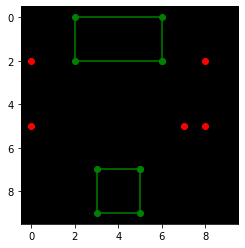

In [239]:
def is_rectangle(points):
    
    def IsOrthogonal(a, b, c) :
        return (b[0] - a[0]) * (b[0] - c[0]) + (b[1] - a[1]) * (b[1] - c[1]) == 0

    # if len(points) != 4:
    #     return False
    if IsOrthogonal(points[0], points[1], points[2]) and IsOrthogonal(points[1], points[2], points[3]):
        return True
    return False

def is_point_in_line(a, b, c):
    if (a[0] == b[0]):
        if (a[0] == c[0]):
            return True
        else:
            return False
    else:
        if (a[0] == c[0]):
            return True
        else:
            return False

def splitLinesOn(points, split_point):
    new_points = []
    for index in range(len(points)):
        # check if the point is on the line of points[index] and points[index+1]
        if(index == len(points)-1):
            return False
        else:
            if is_point_in_line(points[index], points[index+1], split_point):
                # print("split point", split_point," is on line", points[index], points[index+1])
                return points[index], points[index+1]
    return False


def cutBoxes(points, inner_points, intersection_point, bounrday, log=False):
    final_boxes = []
    polygons = []
    if(len(inner_points)>0):
        last_point = inner_points[-1]
        if log:
            print("__________________________>", last_point)
            print(intersection_point, "inner_points: ("+str(intersection_point)+","+str(last_point))
        # get next points from points from last_point until intersection_point
        first_box = [intersection_point]
        second_box = [intersection_point]
        start_boundary = False
        new_point = False
        # check if last_point is not in points
        if last_point not in points and last_point in bounrday:
            if log:
                print("last_point is in bounrday, cut : ", (intersection_point, last_point))
            split_lines = splitLinesOn(points, last_point)
            print("split_lines: ", split_lines)
            first_box = [intersection_point, last_point]
            second_box = [intersection_point, last_point]
            s_point = last_point
            last_point = split_lines[1]
            new_point = split_lines[0]
            if log:
                print("second box will start from ", intersection_point, s_point, new_point)
            i = points.index(last_point)
            if log:
                print("new last_point: ", last_point)
                print("new i: ", i)
            # intersection_point = split_lines[0]
        else:
            i = points.index(last_point)
    
        while points[i] != intersection_point:
            if points[i] in bounrday:
                start_boundary = True
            if start_boundary:
                first_box.append(points[i])
            i += 1
            i = i%len(points)
        start_boundary = False
        # if not new_point:
        #     i = points.index(last_point)
        # else:
        #     i = points.index(new_point)
        i = points.index(last_point)

        while points[i] != intersection_point:
            if points[i] in bounrday:
                start_boundary = True
            if start_boundary:
                second_box.append(points[i])
            i -= 1
            i = i%len(points)
        # if log:
        # first_box = synthesizePoints(first_box)
        print("F: ", first_box, is_rectangle(first_box))
        print("S: ", second_box, is_rectangle(second_box))

        if is_rectangle(first_box):
            final_boxes.append(first_box)
        else:
            polygons.append(first_box)
        if is_rectangle(second_box):
            final_boxes.append(second_box)
        else:
            polygons.append(second_box)
    return final_boxes, polygons

def findBoxes(points, edge, log=False):
    bounrday = generateAllBoundaryPoints(points)
    final_boxes = []
    for intersection_point in points:
        inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="l")
        if log:
            print("__________________________", len(inner_points), "intersection_point: ", intersection_point)
        tmp_boxes, polygons = cutBoxes(points, inner_points, intersection_point, bounrday, log)
        # remove box_lines from points
        for box in tmp_boxes:
            final_boxes.append(box)
            print("box: ", box)
            for line in box:
                for point in points:
                    # print("remove point: ", point, line)
                    if point == line:
                        # start remoing points
                        points.remove(point)
                        break
    print ("final_boxes ===> ", final_boxes)
    return points, final_boxes
showBoxes()

In [238]:
def showBoxes():
    points = [(2,0), (6,0), (6,2), (8,2), (8,5), (7,5), (7,7), (5,7), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]
    # create a blank image of size 100x100
    img = np.zeros((10,10,3), np.uint8)

    plt.clf()

    edge_x = (0, 9)
    edge_y = (0, 9)
    edge = (edge_x, edge_y)

    # cut_lines = findCutLines(points, edge)
    new_points, boxes = findBoxes(points, edge)
    for box in boxes:
        x_values = [box[0][0], box[1][0], box[2][0], box[3][0], box[0][0]]
        y_values = [box[0][1], box[1][1], box[2][1], box[3][1], box[0][1]]
        plt.plot(x_values, y_values, color="g", marker="o", linestyle="-")

    new_points1, boxes1 = findBoxes(new_points, edge)
    print("------------------------------")
    print("boxes1: ", boxes1)
    for box in boxes1:
        for line in box:
            # plt
            print("ll -> ", line)
            x_values = [line[0]]
            y_values = [line[1]]
            plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")

        # x_values = [box[0][0], box[1][0], box[2][0], box[3][0], box[0][0]]
        # y_values = [box[0][1], box[1][1], box[2][1], box[3][1], box[0][1]]
        # plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")

    print("3rd time : ", new_points1)
    new_points2, boxes2 = findBoxes(new_points1, edge, True)
    
    for box in boxes2:
        x_values = [box[0][0], box[1][0], box[2][0], box[3][0], box[0][0]]
        y_values = [box[0][1], box[1][1], box[2][1], box[3][1], box[0][1]]
        plt.plot(x_values, y_values, color="b", marker="o", linestyle="-")

    # print("Boxes2 : ", boxes2)


    print(cut_lines)

    # for index in range(len(new_points2)):
    #     x =  points[index]
    #     if(index >= len(points)-1):
    #         y = points[0]
    #     else:
    #         y = points[index+1]

    #     x_values = [x[0], y[0]]
    #     y_values = [x[1], y[1]]
    #     plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")

            
    # for box in boxes:
    #     x_values = [box[0][0], box[1][0], box[2][0], box[3][0], box[0][0]]
    #     y_values = [box[0][1], box[1][1], box[2][1], box[3][1], box[0][1]]
    #     plt.plot(x_values, y_values, color="g", marker="o", linestyle="-")

    plt.imshow(img)

def runCode():
    
    # create a blank image of size 100x100
    img = np.zeros((10,10,3), np.uint8)

    plt.clf()

    fig = plt.figure(figsize=(10, 10))
    color =  (255, 0, 0)
    # x1, y1 = [0, 0], [20, 20]
    bounrday = generateAllBoundaryPoints(points)
    start_point = points[0]
    previous_line = None
        
    edge_x = (0, 9)
    edge_y = (0, 9)
    edge = (edge_x, edge_y)

    cut_lines = findCutLines(points, edge)

    print(cut_lines)

    for index in range(len(points)):
        x =  points[index]
        if(index >= len(points)-1):
            y = points[0]
        else:
            y = points[index+1]

        x_values = [x[0], y[0]]
        y_values = [x[1], y[1]]
        plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")

            
    for cut_line in cut_lines:
        x_values = [cut_line[0][0], cut_line[1][0]]
        y_values = [cut_line[0][1], cut_line[1][1]]
        plt.plot(x_values, y_values, color="b", marker="", linestyle="-")

    plt.imshow(img)

[[(6, 2), (2, 2)], [(6, 2), (6, 7)], [(7, 5), (0, 5)], [(7, 5), (7, 2)], [(5, 7), (3, 7)], [(5, 7), (5, 0)], [(3, 7), (3, 0)], [(2, 2), (2, 7)]]


<Figure size 432x288 with 0 Axes>

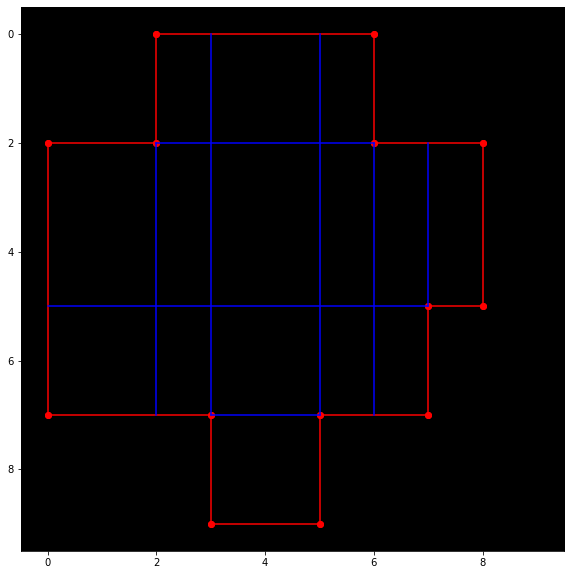

In [182]:
runCode()

In [141]:
a = (2, 0) 
b = (6, 0) 
c = (0, 5)

# check if c is in line ab
def is_in_line(a, b, c):
    if (a[0] == b[0]):
        if (a[0] == c[0]):
            return True
        else:
            return False
    else:
        if (a[0] == c[0]):
            return True
        else:
            return False
print(is_in_line(a, b, c))

def is_point_in_line(a, b, c):
    if(a[0] == b[0]):
        if(c[0] == a[0]):
            return True
        else:
            return False
    else:
        if(c[0] == a[0]):
            return False
        else:
            return True
            

# check if c fall into ab line
if(is_point_in_line(a, b, c)):
    print("c is in line")
else:
    print("c is not in line")


False
c is in line
